# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Bringing in sign names for labelling
sign_names = []
with open('signnames.csv') as sign:
    signname_reader = csv.DictReader(sign)
    sign_names = [row['SignName'] for row in signname_reader]
    
print("Done.")

Done.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

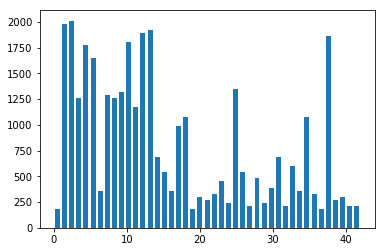

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

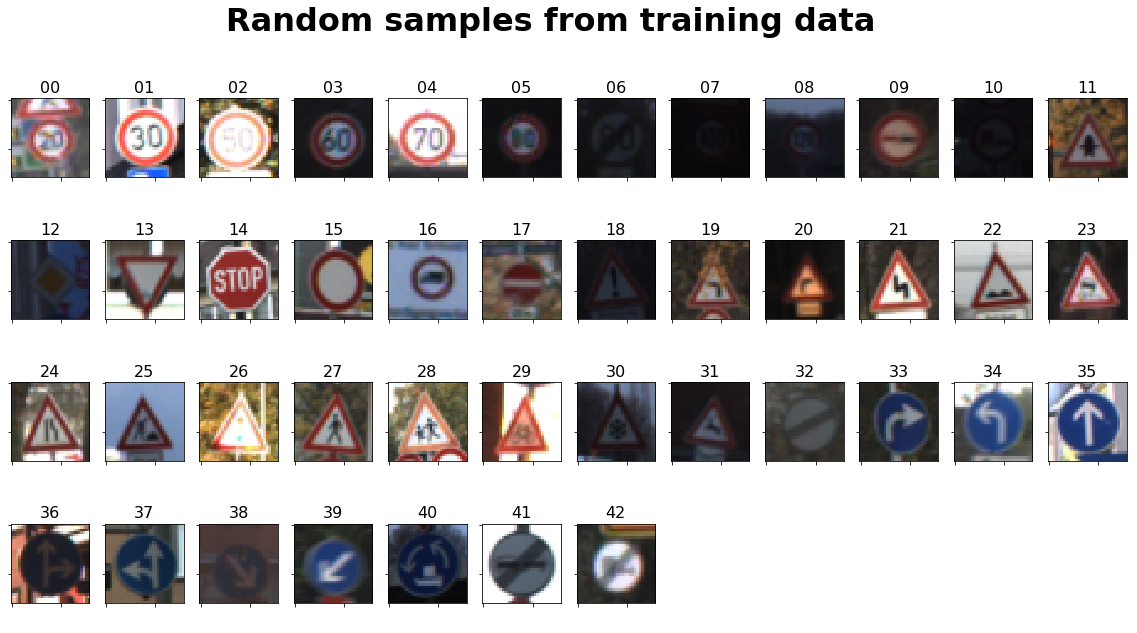

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# show a random sample from each class of the traffic sign dataset
rows, cols = 4, 12
fig, ax_array = plt.subplots(rows, cols,figsize=(20,10))
plt.suptitle('Random samples from training data', fontsize=32, fontweight='bold')
for class_idx, ax in enumerate(ax_array.ravel()):
    if class_idx < n_classes:
        # show a random image of the current class
        cur_X = X_train[y_train == class_idx]
        cur_img = cur_X[np.random.randint(len(cur_X))]
        ax.imshow(cur_img)
        ax.set_title('{:02d}'.format(class_idx), fontsize=16)
    else:
        ax.axis('off')
        
# hide both x and y ticks
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.draw()

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### 1. Grayscaling
Grayscaling reduces the image to a single layer instead of 3 RGB channels, drastically reducing the number of variables the network has to deal with. This results in vastly improved processing times. While loss of information due to loss of colour could be a concern, my tests with both RGB and BW images show no significant difference in performance.

#### 2. Equalisation
Equalisation of the image helps improve contrast and provides clearer, more well-defined edges. I initially used OpenCV's histogram equalisation, but found the results to be blurry and of poor contrast. skimage's adaptive CLAHE implementation took longer to process, but gave a far superior result.

#### 3. Normalisation
Normalisation involves scaling the image's intensity range from (0, 255) to (-1, 1). Smaller values with means about 0 prevent our gradients from going out of control and finding incorrect local minima.

#### 4. Augmentation (Transformation)
Due to the low number of examples from some classes, I've chosen to re-balance the dataset to prevent bias in the mode. There after, I tripled the size of the dataset over all classes, including the ones already heavily represented. I initially attempted penalised classification to make up for the dataset imbalance, but found good ol' data augmentation more effective.

#### 5. Shuffling
Rather self-explanatory - shuffles the dataset around so that the model doesn't train itself on the ORDER of the images instead of the features.


Preprocessing completed.
Done shuffle
(34799, 32, 32, 1)
7


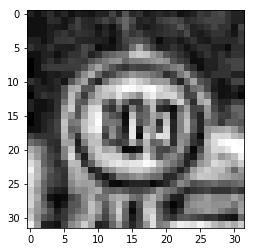

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from sklearn.utils import shuffle


from skimage import exposure
from sklearn.utils import shuffle
from skimage import exposure
import cv2

def batchPreprocess(X):
    X_norm = []  
    for image in X:
        bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        equ = exposure.equalize_adapthist(bw)
        equ = (equ * 2.0/equ.max())
        equ = np.reshape(equ,(32,32,1))-1
        X_norm.append(equ)
    return np.array(X_norm)

X_train_norm = batchPreprocess(X_train)
X_test_norm = batchPreprocess(X_test)
X_valid_norm = batchPreprocess(X_valid)

print("Preprocessing completed.")

# # Shuffle the data
X_train_s, y_train_s = shuffle(X_train_norm, y_train)
X_valid_s, y_valid_s = shuffle(X_valid_norm, y_valid)

X_test_s = X_test_norm
y_test_s = y_test

print("Done shuffle")
print(X_train_s.shape)
print(y_train_s[0])
plt.imshow(X_train_s[0].squeeze(), cmap='gray')

### Augmentation (Transformation)
Here, we will employ rotation (within a certain degree range) and warping through projective transforms (skimage). Projective transforms were chosen due to their similarity to changes in camera perspective.

Credits to Alex for helping me figure out projective transforms! His code and write-up helped clarify the frankly rather confusing usage of skimage projective transforms. His blog [here](http://navoshta.com/).

NOTE: In earlier testing, doubling the dataset size without re-balancing it already yielded an accuracy of 95% on the validation data. While that seems nice, there is a high chance that the incorrect 5% stems from under-represented classes, rendering the prediction useless.

In [6]:
from skimage.transform import ProjectiveTransform
from skimage.transform import rotate
from skimage.transform import warp

def randomTransform(image, intensity):
    
    # Rotate image within a set range, amplified by intensity of overall transform.
    rotation = 20 * intensity
    # print(image.shape)
    rotated = rotate(image, np.random.uniform(-rotation,rotation), mode = 'edge')
    
    # Projection transform on image, amplified by intensity.
    image_size = image.shape[0]
    magnitude = image_size * 0.3 * intensity
    tl_top = np.random.uniform(-magnitude, magnitude)     # Top left corner, top margin
    tl_left = np.random.uniform(-magnitude, magnitude)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-magnitude, magnitude)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-magnitude, magnitude)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-magnitude, magnitude)     # Top right corner, top margin
    tr_right = np.random.uniform(-magnitude, magnitude)   # Top right corner, right margin
    br_bottom = np.random.uniform(-magnitude, magnitude)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-magnitude, magnitude)   # Bottom right corner, right margin
    
    transform = ProjectiveTransform()
    transform.estimate(np.array((
            (tl_left, tl_top),
            (bl_left, image_size - bl_bottom),
            (image_size - br_right, image_size - br_bottom),
            (image_size - tr_right, tr_top))),
            np.array((
            (0, 0),
            (0, image_size),
            (image_size, image_size),
            (image_size, 0)
            )))
    transformed = warp(rotated, transform, output_shape = (image_size, image_size), order = 1, mode = 'edge')
    return transformed

def batchAugment(X, y, multiplier = 2):
    X_train_aug = []
    y_train_aug = []
    for i in range(len(X)):
        for j in range(multiplier):
            augmented = randomTransform(X[i], 0.75)
            X_train_aug.append(augmented)
            y_train_aug.append(y[i])
        X_train_aug.append(X[i])
        y_train_aug.append(y[i])
        
    X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
    print("New augmented size is: ", len(X_train_aug))
    return X_train_aug, y_train_aug

def findIndexofSameClass(y, v):
    index = []
    for i in range(len(y)):
        if y[i] == v:
            index.append(i)
    return index
            
        

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
print("Original distribution of classes: ", counts)
multiplier = [int(round(max(counts)/i)) for i in counts] # Required multiplier for each class augmentation.
print("Multipliers for each class: ", multiplier)
multiplier = [i-1 for i in multiplier]



X_train_aug = np.copy(X_train_s)
y_train_aug = np.copy(y_train_s)

types = range(n_classes)
for i in types:
    if multiplier[i] > 0: # Ignore classes which don't need oversampling
        X_train_add = []
        y_train_add = []
        index = findIndexofSameClass(y_train_s, i)
        for j in index:
            X_train_add.append(X_train_s[j])
            y_train_add.append(y_train_s[j])
        X_train_add = np.array(X_train_add)
        X_train_add = np.reshape(X_train_add, (len(index),32,32,1))
        y_train_add = np.array(y_train_add)
        y_train_add = np.reshape(y_train_add, (len(index)))
    
        print("Class: ", i)
        X_train_add, y_train_add = batchAugment(X_train_add, y_train_add, multiplier[i])
        X_train_aug = np.vstack((X_train_aug, X_train_add))
        print("New total dataset size: ",len(X_train_aug))
        y_train_aug = np.append(y_train_aug, y_train_add)
        print("")


Original distribution of classes:  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Multipliers for each class:  [11, 1, 1, 2, 1, 1, 6, 2, 2, 2, 1, 2, 1, 1, 3, 4, 6, 2, 2, 11, 7, 7, 6, 4, 8, 1, 4, 10, 4, 8, 5, 3, 10, 3, 6, 2, 6, 11, 1, 7, 7, 10, 10]
Class:  0
New augmented size is:  1980
New total dataset size:  36779

Class:  3
New augmented size is:  2520
New total dataset size:  39299

Class:  6
New augmented size is:  2160
New total dataset size:  41459

Class:  7
New augmented size is:  2580
New total dataset size:  44039

Class:  8
New augmented size is:  2520
New total dataset size:  46559

Class:  9
New augmented size is:  2640
New total dataset size:  49199

Class:  11
New augmented size is:  2340
New total dataset size:  51539

Class:  14
New augmented size is:  2070
New total dataset size:  53609

Class:  15

### Histogram of the new distribution.

New distribution of classes:  [2160 1980 2010 3780 1770 1650 2520 3870 3780 3960 1800 3510 1890 1920 2760
 2700 2520 2970 3240 2160 2400 2160 2310 2250 2160 1350 2700 2310 2400 2160
 2340 2760 2310 2396 2520 3240 2310 2160 1860 2160 2400 2310 2310]


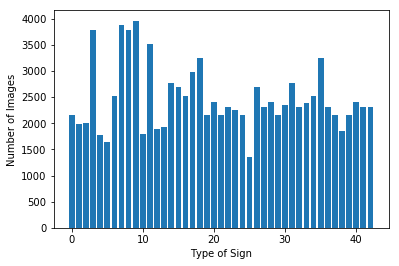

In [8]:
unique, counts = np.unique(y_train_aug, return_counts=True)
print("New distribution of classes: ", counts)

plt.bar(types, counts, width=0.8, align='center')
plt.ylabel('Number of Images')
plt.xlabel('Type of Sign')
plt.show()

### Multiplying the entire dataset

In [9]:
# Triple the dataset size by rotation and transformation
X_train_aug, y_train_aug = batchAugment(X_train_aug, y_train_aug, 1)
y_train_aug = np.array(y_train_aug)

print("Augmentation complete!")

New augmented size is:  212452
Augmentation complete!


### Visualisation of the Pre-processing Steps

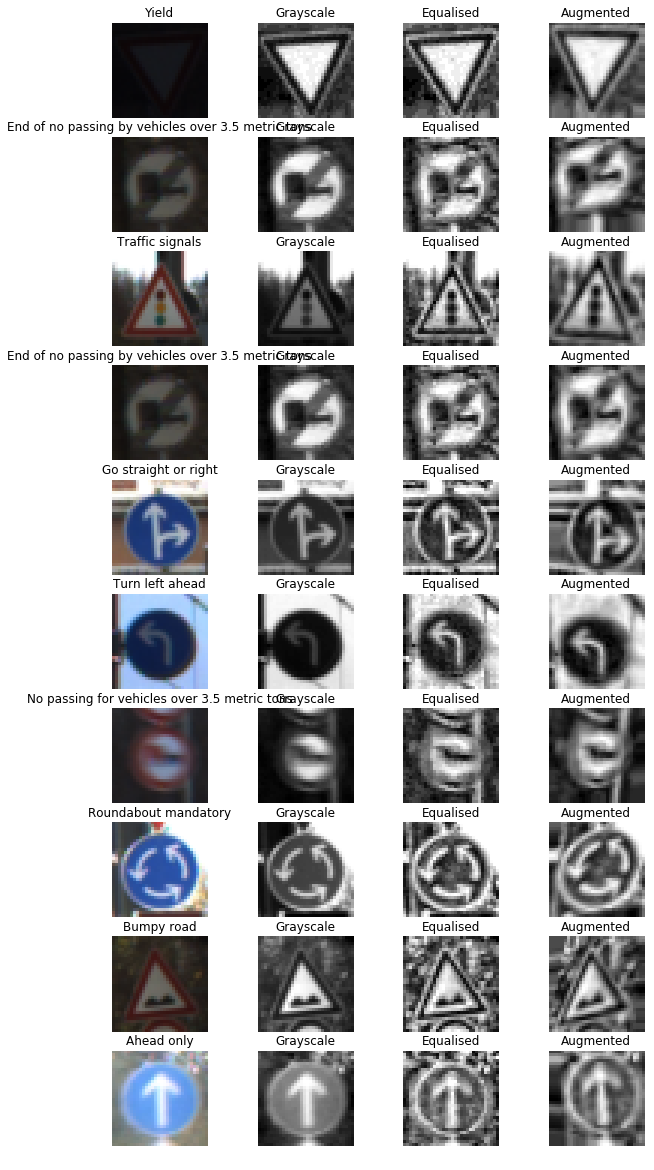

In [44]:
fig = plt.figure(figsize=(10,90))
plot = 1

for i in np.random.choice(types, 10):
    index = np.where(y_train==i)
    
    image = X_train[index[0][20]].squeeze()
    ax1 = fig.add_subplot(43,4,plot)
    ax1.set_title(sign_names[i])
    plt.axis('off')
    plt.imshow(image)
    
    bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ax2 = fig.add_subplot(43,4,plot+1)
    ax2.set_title('Grayscale')
    plt.axis('off')
    plt.imshow(bw, cmap='gray')
    
    equ = exposure.equalize_adapthist(bw)
    ax3 = fig.add_subplot(43,4,plot+2)
    ax3.set_title('Equalised')
    plt.axis('off')
    plt.imshow(equ, cmap='gray')
    
    proc = randomTransform(equ, 0.5)
    ax4 = fig.add_subplot(43,4,plot+3)
    ax4.set_title('Augmented')
    plt.axis('off')
    plt.imshow(proc, cmap='gray')
    
    plot += 4
    

## Setup TensorFlow 
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### TensorFlow Parameters

In [12]:
rate = 0.0009
EPOCHS = 200
BATCH_SIZE = 128

## Features and Labels
Train traffic_signs_net to classify traffic sign data.

- `x` is a placeholder for a batch of input images.
- `y` is a placeholder for a batch of output labels.
- `keep_prob` is a placeholder for the keep probability.

In [13]:
with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)
    keep_prob_l1 = tf.placeholder(tf.float32)
    keep_prob_l2 = tf.placeholder(tf.float32)
    keep_prob_l3 = tf.placeholder(tf.float32)
    keep_prob_l4 = tf.placeholder(tf.float32)

### Modeified LeNet Model Architecture

In [64]:
def conv2d(x, W, b, strides=1, padding='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def traffic_signs_net(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    n_classes = 43
    
    #weight => [filter_size_height, filter_size_width, color_channels, k_output]))
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], stddev=sigma)),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], stddev=sigma)),
        'wd1': tf.Variable(tf.truncated_normal([400, 120], stddev=sigma)),
        'wd2': tf.Variable(tf.truncated_normal([120, 84], stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([84, n_classes], stddev=sigma))}

    biases = {
        'bc1': tf.Variable(tf.truncated_normal([6], stddev=sigma)),
        'bc2': tf.Variable(tf.truncated_normal([16], stddev=sigma)),
        'bd1': tf.Variable(tf.truncated_normal([120], stddev=sigma)),
        'bd2': tf.Variable(tf.truncated_normal([84], stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([n_classes], stddev=sigma))}
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Stride for each dimension: [batch, height, width, depth]
    
    x = conv2d(x, weights['wc1'], biases['bc1'], 1, 'VALID')
    
    # TODO: Activation.
    print("layer 1 shape:",x.get_shape())
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob_l1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    
    x = maxpool2d(x)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    
    x = conv2d(x, weights['wc2'], biases['bc2'], 1, 'VALID')
    print("layer 2 shape:",x.get_shape())
    # TODO: Activation.
    
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob_l2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    
    x = maxpool2d(x)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    
    x = tf.reshape(x, [-1, weights['wd1'].get_shape().as_list()[0]])   
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.

    x = tf.add(tf.matmul(x, weights['wd1']), biases['bd1'])

    # TODO: Activation.
    print("layer 3 shape:",x.get_shape())
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob_l3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    x = tf.add(tf.matmul(x, weights['wd2']), biases['bd2'])
    
    # TODO: Activation.
    print("layer 4 shape:",x.get_shape())
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob_l4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(x, weights['out']), biases['out'])
    print("layer 5 shape:",logits.get_shape())
    
    return logits

## Training Pipeline

In [65]:
logits = traffic_signs_net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer 2 shape: (?, 10, 10, 16)
layer 3 shape: (?, 120)
layer 4 shape: (?, 84)
layer 5 shape: (?, 43)


## Evaluation

In [66]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Evaluate function
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_l1: 1.0, keep_prob_l2: 1.0, keep_prob_l3: 1.0, keep_prob_l4: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
save_file='./traffic_signs_net'

# Training data
with tf.Session() as sess:
    #saver.restore(sess, save_file)
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_aug)
    
    print("Training with {} inputs...".format(len(X_train_aug)))
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug[offset:end], y_train_aug[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_l1: 0.9, keep_prob_l2: 0.8, keep_prob_l3: 0.7, keep_prob_l4: 0.5})
            
        validation_accuracy = evaluate(X_valid_s, y_valid_s)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_path='./traffic_signs_net')
    print("Model saved")

Training with 212452 inputs...
Training...

EPOCH 1 ...
Validation Accuracy = 0.808

EPOCH 2 ...
Validation Accuracy = 0.867

EPOCH 3 ...
Validation Accuracy = 0.889

EPOCH 4 ...
Validation Accuracy = 0.918

EPOCH 5 ...
Validation Accuracy = 0.931

EPOCH 6 ...
Validation Accuracy = 0.930

EPOCH 7 ...
Validation Accuracy = 0.950

EPOCH 8 ...
Validation Accuracy = 0.945

EPOCH 9 ...
Validation Accuracy = 0.954

EPOCH 10 ...
Validation Accuracy = 0.953

EPOCH 11 ...
Validation Accuracy = 0.961

EPOCH 12 ...
Validation Accuracy = 0.964

EPOCH 13 ...
Validation Accuracy = 0.964

EPOCH 14 ...
Validation Accuracy = 0.964

EPOCH 15 ...
Validation Accuracy = 0.965

EPOCH 16 ...
Validation Accuracy = 0.965

EPOCH 17 ...
Validation Accuracy = 0.966

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.967

EPOCH 20 ...
Validation Accuracy = 0.962

EPOCH 21 ...
Validation Accuracy = 0.968

EPOCH 22 ...
Validation Accuracy = 0.973

EPOCH 23 ...
Validation Accuracy = 0.969


### Test Accuracy

In [18]:
save_file='./traffic_signs_net'

with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test_s, y: y_test_s, keep_prob_l1: 1.0, keep_prob_l2: 1.0, keep_prob_l3: 1.0, keep_prob_l4: 1.0})
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_signs_net
Test Accuracy = 0.952


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### A Closer Look at the Test Set
The model managed to get all 5 chosen images from the test set, and with reasonably high confidence to boot. This is pretty encouraging, considering this is a previously unseen set!

In [62]:
save_file='./traffic_signs_net'
top_k_operation = tf.nn.top_k(logits, 5)
sample = X_test_s[0:5]
original = X_test[0:5]

with tf.Session() as sess:
    saver.restore(sess, save_file)
    top_k_output = sess.run(top_k_operation, feed_dict={x: sample, keep_prob_l1: 1.0, keep_prob_l2: 1.0, keep_prob_l3: 1.0, keep_prob_l4: 1.0})

INFO:tensorflow:Restoring parameters from ./traffic_signs_net


Accuracy : 1.0


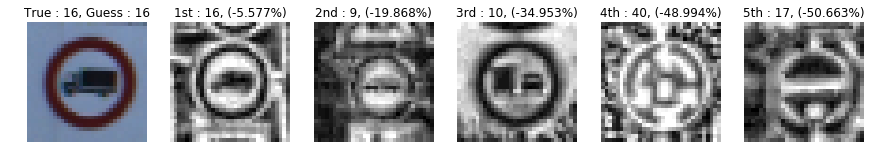

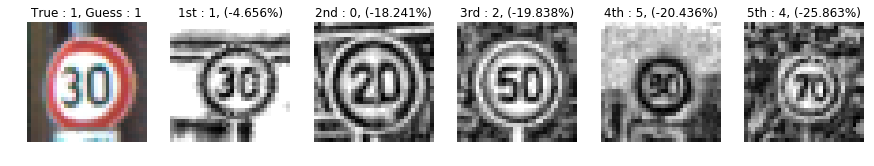

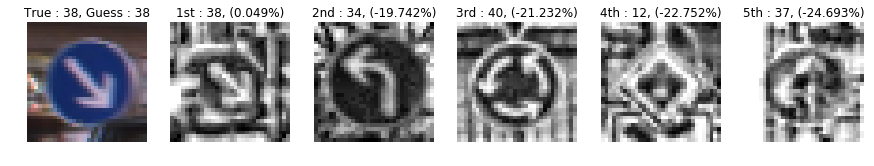

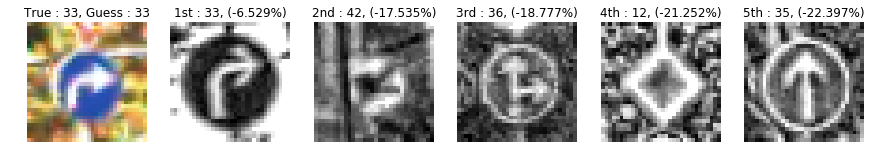

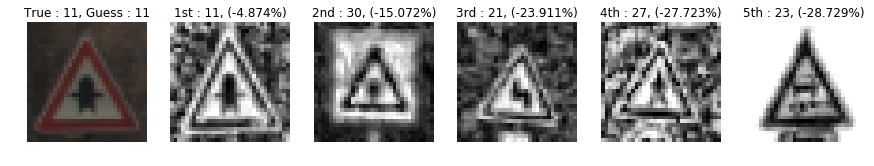

In [63]:
score = 0

for i in range(len(original)):
    fig, ax = plt.subplots(1, 6, figsize=(15, 3))
    ax = ax.ravel()
    
    if y_test[i] == top_k_output.indices[i][0]:
        score += 1
    
    #ax[1].bar(top_k_output.indices[i], top_k_output.values[i])
    ax[0].axis('off')
    ax[0].set_title("True : {}".format(y_test[i]) + ", Guess : {}".format(top_k_output.indices[i][0]))
    ax[0].imshow(original[i])
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][0]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[1].axis('off')
    ax[1].set_title("1st : {}".format(top_k_output.indices[i][0]) + ", ({:0.3f}%)".format(top_k_output.values[i][0]))
    ax[1].imshow(cur_img.squeeze(), cmap='gray')
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][1]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[2].axis('off')
    ax[2].set_title("2nd : {}".format(top_k_output.indices[i][1]) + ", ({:0.3f}%)".format(top_k_output.values[i][1]))
    ax[2].imshow(cur_img.squeeze(), cmap='gray')
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][2]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[3].axis('off')
    ax[3].set_title("3rd : {}".format(top_k_output.indices[i][2]) + ", ({:0.3f}%)".format(top_k_output.values[i][2]))
    ax[3].imshow(cur_img.squeeze(), cmap='gray')
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][3]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[4].axis('off')
    ax[4].set_title("4th : {}".format(top_k_output.indices[i][3]) + ", ({:0.3f}%)".format(top_k_output.values[i][3]))
    ax[4].imshow(cur_img.squeeze(), cmap='gray')
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][4]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[5].axis('off')
    ax[5].set_title("5th : {}".format(top_k_output.indices[i][4]) + ", ({:0.3f}%)".format(top_k_output.values[i][4]))
    ax[5].imshow(cur_img.squeeze(), cmap='gray')


print("Accuracy : {}".format(score/5.0))

### Test Set Pulled From The Web
The following are 6 images I pulled from the web. The only requirements I set were that they were German, and already existed in the signnames.csv database.

### Load and Output the Images

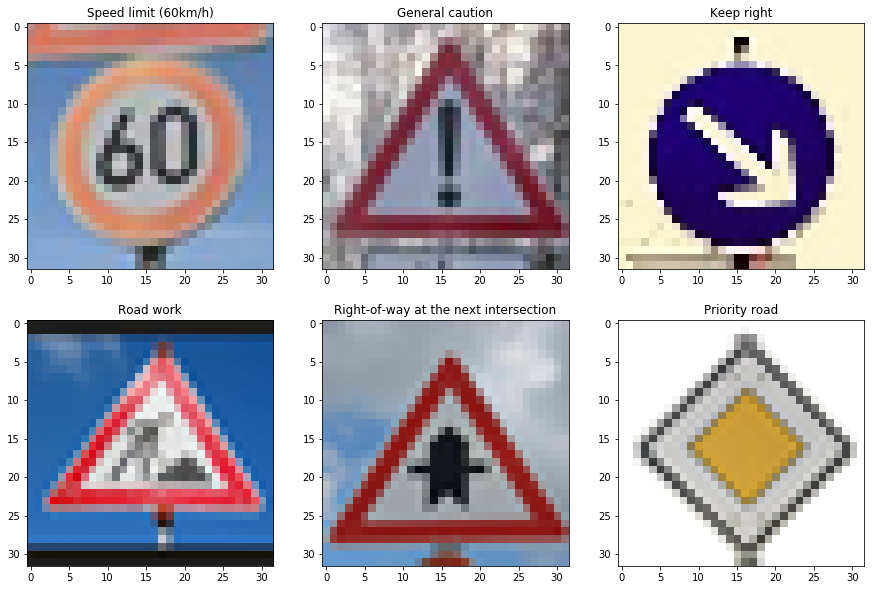

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import cv2

X_web = []
y_web = [3, 18, 38, 25, 11, 12]
for filename in glob.glob('test_web/*x.png'): #assuming gif
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X_web.append(img)
    
fig, ax = plt.subplots(2, 3, figsize=(15,10))
for i in range(len(X_web)):
    ax = ax.ravel()
    ax[i].imshow(X_web[i])
    ax[i].set_title(sign_names[y_web[i]])

X_web = np.asarray(X_web)
X_web_proc = batchPreprocess(X_web)

### Predict the Sign Type for Each Image

### Analyze Performance
Manage to get 5 out of 6 correct.

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = evaluate(X_web_proc, y_web)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_signs_net
Test Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./traffic_signs_net


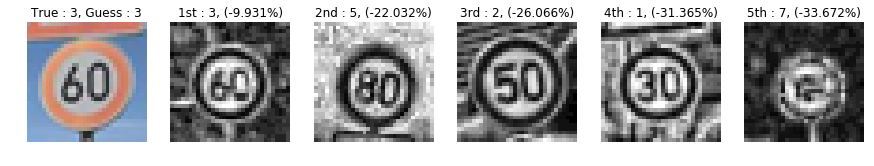

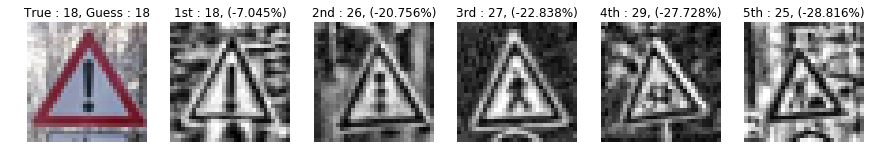

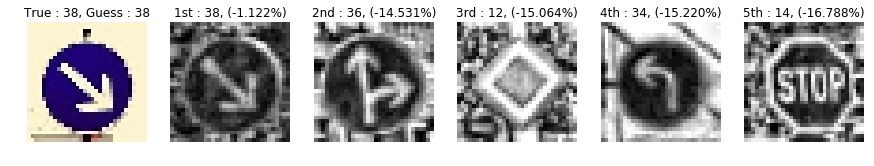

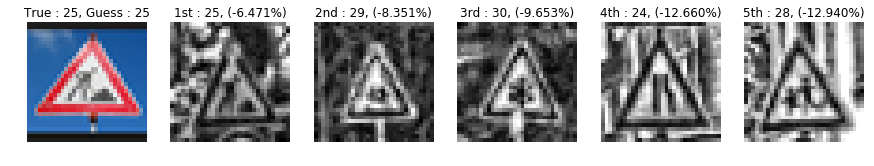

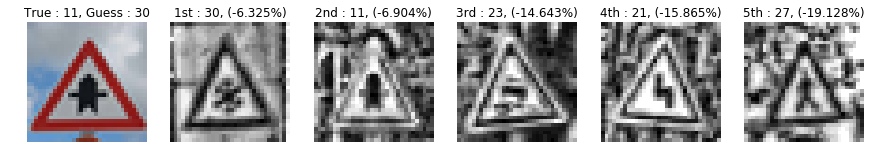

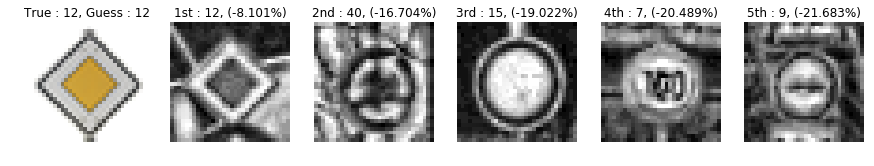

In [60]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_k_operation = tf.nn.top_k(logits, 5)

with tf.Session() as sess:
    saver.restore(sess, save_file)
    top_k_output = sess.run(top_k_operation, feed_dict={x: X_web_proc, keep_prob_l1: 1.0, keep_prob_l2: 1.0, keep_prob_l3: 1.0, keep_prob_l4: 1.0})
for i in range(len(X_web)):
    fig, ax = plt.subplots(1, 6, figsize=(15, 3))
    ax = ax.ravel()

    #ax[1].bar(top_k_output.indices[i], top_k_output.values[i])
    ax[0].axis('off')
    ax[0].set_title("True : {}".format(y_web[i]) + ", Guess : {}".format(top_k_output.indices[i][0]))
    ax[0].imshow(X_web[i])
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][0]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[1].axis('off')
    ax[1].set_title("1st : {}".format(top_k_output.indices[i][0]) + ", ({:0.3f}%)".format(top_k_output.values[i][0]))
    ax[1].imshow(cur_img.squeeze(), cmap='gray')
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][1]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[2].axis('off')
    ax[2].set_title("2nd : {}".format(top_k_output.indices[i][1]) + ", ({:0.3f}%)".format(top_k_output.values[i][1]))
    ax[2].imshow(cur_img.squeeze(), cmap='gray')
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][2]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[3].axis('off')
    ax[3].set_title("3rd : {}".format(top_k_output.indices[i][2]) + ", ({:0.3f}%)".format(top_k_output.values[i][2]))
    ax[3].imshow(cur_img.squeeze(), cmap='gray')
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][3]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[4].axis('off')
    ax[4].set_title("4th : {}".format(top_k_output.indices[i][3]) + ", ({:0.3f}%)".format(top_k_output.values[i][3]))
    ax[4].imshow(cur_img.squeeze(), cmap='gray')
    
    cur_X = X_train_s[y_train_s == top_k_output.indices[i][4]]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    ax[5].axis('off')
    ax[5].set_title("5th : {}".format(top_k_output.indices[i][4]) + ", ({:0.3f}%)".format(top_k_output.values[i][4]))
    ax[5].imshow(cur_img.squeeze(), cmap='gray')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [24]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")